In [10]:
import pandas as pd
X1 = pd.read_csv('data/X_test_1306.csv')
y1 = pd.read_csv('1306_factor.csv')

grouped = train.groupby('match_id')
grouped_dfs = {}
for name, group_df in grouped:
    group_df.factor = group_df.factor.diff().fillna(0)
    grouped_dfs[name] = group_df
    group_df.drop('match_id', axis=1, inplace=True)
    y1 = group_df.factor
    group_df.drop('factor',axis=1,inplace=True)
    X1 = group_df
    break

In [11]:
import statsmodels.api as sm
X1 = sm.add_constant(X1)  
model = sm.OLS(y1, X1).fit()
print(model.summary())
print("F-statistic:", model.fvalue)
print("p-value for F-test:", model.f_pvalue)
print("R-squared value:", model.rsquared)


                            OLS Regression Results                            
Dep. Variable:                 factor   R-squared:                       0.783
Model:                            OLS   Adj. R-squared:                  0.742
Method:                 Least Squares   F-statistic:                     19.33
Date:                Tue, 06 Feb 2024   Prob (F-statistic):           1.77e-66
Time:                        02:36:13   Log-Likelihood:                -542.32
No. Observations:                 332   AIC:                             1191.
Df Residuals:                     279   BIC:                             1392.
Df Model:                          52                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

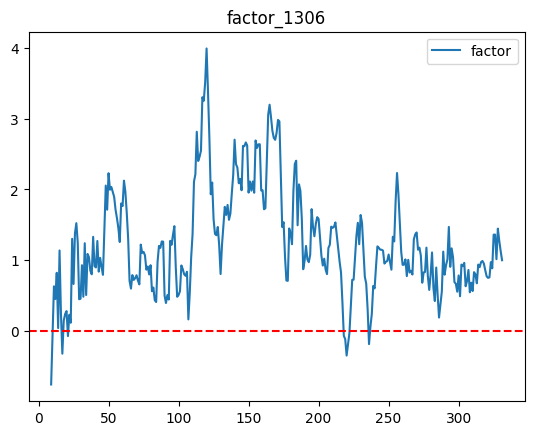

In [15]:
import matplotlib.pyplot as plt
y1.rolling(10).mean().plot(title = 'factor_1306')
plt.axhline(y=0, color='r', linestyle='--', label='y=0')